In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [26]:

# наши данные - файл experted_data.csv
# seeds_df = pd.read_csv(
# "./expertdata.txt")
# seeds_df = pd.read_csv(
# "./full_expertdata.txt")
passengers = pd.read_csv(
"./expertdata.txt")

passengers


,FirstName,LastName,amountFlights,travleClass,foodInfo,circle,collapsed,baggage
0,FILIPP,NOSOV,4,1,1,1,2,1
1,VADIM,RUMIANTSEV,1,1,1,0,0,1
2,SERGEI,ANDRIANOV,4,1,1,0,3,1
3,VERONIKA,TKACHEVA,7,1,1,2,3,1
4,ADEL,BORISOV,2,1,1,0,2,0
...,...,...,...,...,...,...,...,...
485,ROBERT,RIABININ,1,1,0,0,0,0
486,ARTUR,SHESTAKOV,6,1,1,1,3,0
487,RAMIL,NAZAROV,2,1,0,0,2,0
488,RUSTAM,TIMOFEEV,15,1,1,2,10,1


In [12]:
model = IsolationForest(contamination=0.1, max_features=0.5)
y_pred = model.fit_predict(passengers.drop(['FirstName', 'LastName'], axis=1))

In [37]:
spies = passengers[y_pred == -1]
normal = passengers[y_pred == 1]

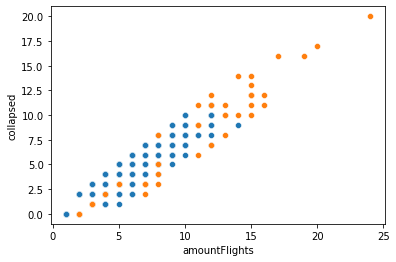

In [38]:

# columns =  ['amountFlights',  'travleClass',  'foodInfo',  'circle',  'collapsed',  'baggage']
columns =  ['amountFlights', 'collapsed' ]
for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            sns.scatterplot(normal[columns[i]], normal[columns[j]])
            sns.scatterplot(spies[columns[i]], spies[columns[j]])
            plt.show()

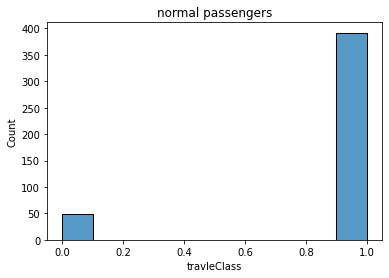

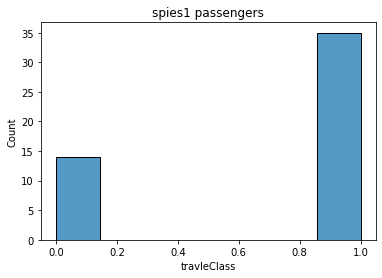

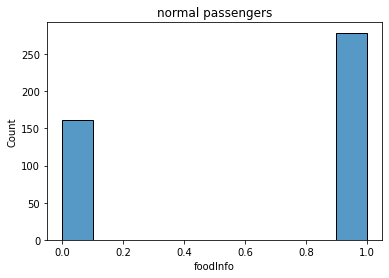

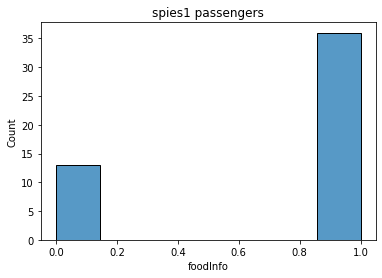

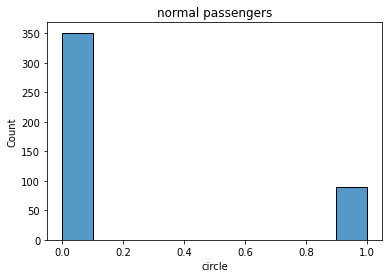

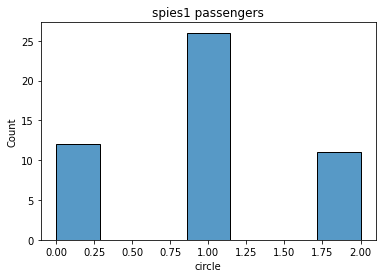

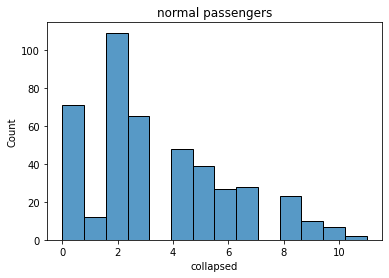

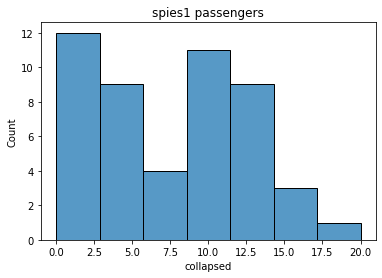

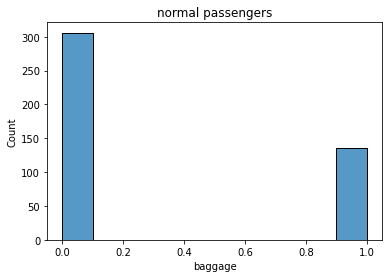

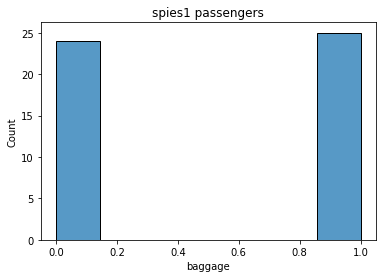

In [39]:
    columns = ['amountFlights', 'travleClass', 'foodInfo',
       'circle', 'collapsed', 'baggage']
    for i in range(1, len(columns)):
        sns.histplot(normal[columns[i]])
        plt.title('normal passengers')
        plt.show()
        sns.histplot(spies[columns[i]])
        plt.title('spies1 passengers')
        plt.show()

In [41]:
spies

,FirstName,LastName,amountFlights,travleClass,foodInfo,circle,collapsed,baggage
3,VERONIKA,TKACHEVA,7,1,1,2,3,1
11,RUSTAM,FADEEV,15,0,1,1,12,1
14,RADMIR,PAVLOVSKII,17,1,1,0,16,0
20,NIKOLAI,CHERNYSHEV,3,1,0,1,1,0
28,SAVVA,NIKOLSKII,3,0,0,1,1,0
39,NATALIIA,POLIAKOVA,24,1,1,1,20,1
43,RUSLAN,MATVEEV,2,1,0,1,0,1
45,ODISSEI,KOSTIN,16,1,1,2,11,0
63,LIANA,MESHCHERIAKOVA,13,0,1,1,11,0
66,ALINA,KAPUSTINA,16,1,1,1,12,1
